In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.api as sm
import os

# EDA PHASE

In [2]:
df=pd.read_csv('D:/assignment ds/simple linear regression/delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
#now checking for any missing values
df.isna().sum()
#as there is no missing values so no need of imputation

Delivery Time    0
Sorting Time     0
dtype: int64

In [4]:
df=df.rename({'Delivery Time':'DeliveryTime','Sorting Time':'SortingTime'},axis=1,)
#removing spaces from column names

In [5]:
#checking datatypes of each column
df.dtypes

DeliveryTime    float64
SortingTime       int64
dtype: object

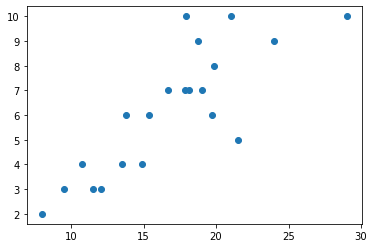

In [6]:
#visualizing the data
#scatter plot
plt.scatter(df['DeliveryTime'],df['SortingTime'])

In [7]:
#checking for correlation
np.corrcoef(df['DeliveryTime'],df['SortingTime'])
#as relationship bw variables is linear and variables are highly associated so we can apply linear regression

array([[1.        , 0.82599726],
       [0.82599726, 1.        ]])

# MODEL BUILDING



In [8]:
import statsmodels.formula.api as smf

In [10]:
#delivery time is dependent variable 
model=smf.ols("DeliveryTime~SortingTime",df).fit()
model

In [11]:
#model summary
model.summary()
#rsquared=.682


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 10 May 2021   Prob (F-statistic):           3.98e-06
Time:                        15:43:04   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\haris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DeliveryTime', ylabel='SortingTime'>

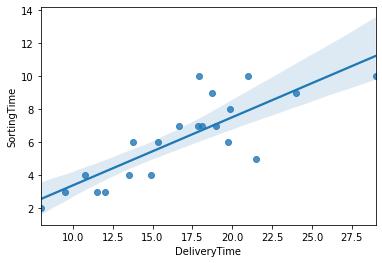

In [12]:
sns.regplot(df['DeliveryTime'],df['SortingTime'])

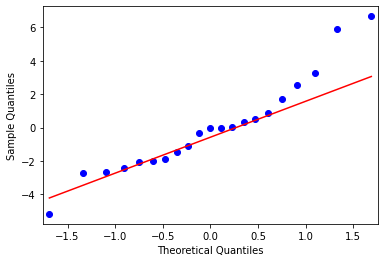

In [13]:
#qqplot
qqplot=sm.qqplot(model.resid,line='q')
#from graph it is evident that errors don't follow normal distribution

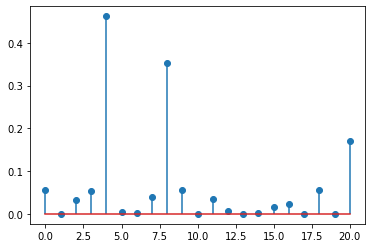

In [14]:
#as rsquare value is less so trying to improve the model
#calculating cooks distance
(c,_)=model.get_influence().cooks_distance
plt.stem(range((df.shape[0])),c)
plt.show()


In [15]:
#now looking for outliers
(np.argmax(c),np.max(c))
#removing 4th row as cooks distance for this is very high as compared to for other rows
df=df.drop(df.index[[4]],axis=0).reset_index()

In [16]:
#again building the model
df=df.drop('index',axis=1)
df

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,15.35,6
5,19.00,7
6,9.50,3
7,17.90,10
8,18.75,9
9,19.83,8


In [17]:
#delivery time is dependent variable 
model=smf.ols("DeliveryTime~SortingTime",df).fit()
model.rsquared


0.660207261776224

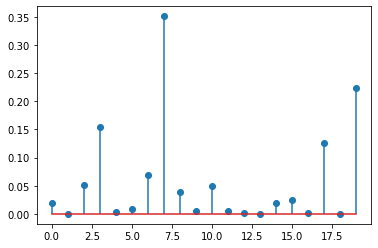

In [18]:
#again cooks distance
(c,_)=model.get_influence().cooks_distance
plt.stem(range(df.shape[0]),c)
plt.show()

In [19]:
(np.argmax(c),np.max(c))
#row 7 may be an outlier so removing it and again building model
df=df.drop(df.index[[7]]).reset_index()


In [20]:
model=smf.ols('DeliveryTime~SortingTime',df).fit()
model.rsquared
#as model accuracy is more than 70% ,lets stop here bcz if we try to treat outliers further number of data points will decrease further 
#which may further reduce accuracy

0.7140755547043909

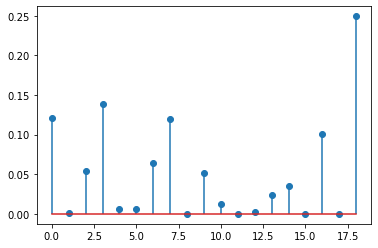

(18, 0.2493262173186027)

In [69]:
#again cooks distance
(c,_)=model.get_influence().cooks_distance
plt.stem(range(df.shape[0]),c)
plt.show()
(np.argmax(c),np.max(c))
#row 7 may be an outlier so removing it and again building model

In [ ]:

#reason for low rsquare value of model is that only sorting time is not enough to predict delivery time.
# or number of observations should be more to get better accuracy.

In [53]:
os.getcwd()

'C:\\Users\\Gaurav Yadav'

In [58]:
df.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.812531
SortingTime,0.812531,1.000000
